<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/main/Solving_Differential_Equations_with_NNs/02_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2: What is a Neural Network?

This notebook will briefly go through the aspects of neural networks that will important for this application.  For a more general overview of neural networks, please see the set of lectures and exercises located [here](https://github.com/GDS-Education-Community-of-Practice/DSECOP/tree/IntroDeepLearn/IntroDeepLearning/lectures).

## What is a neural network?
* Neural networks can be defined as computational systems that can learn to perform tasks by considering examples, generally without being programmed with any task-specific rules. Another way to phrase this is that a neural network is a computational system that learns to match a given input to the correct output. They are a broad category of machine learning algorithms that include popular algorithms such as convolutional neural networks, recurrent neural networks, and deep learning.



## Neural Network Terminology

![NN](https://raw.githubusercontent.com/GDS-Education-Community-of-Practice/DSECOP/main/Solving_Differential_Equations_with_NNs/nn.png)

* Neuron (Node): the simplest unit of a neural network, takes in an input and produces an output.  Neurons are represent by circles in the above diagram.
* Layer: a collection of neurons that act together.  Layers are represented by vertical stacks of neurons in the above diagram.
* Input Layer: the first layer in a neural network, performs no manipulations to the data.  The layer to the very left in the above diagram is the input layer.
* Output Layer: the last layer of a neural network.  The layer to the very left in the above diagram is the output layer.
* Hidden Layer: any other layer of a neural network, in between the input and output layers.  All other layers besides the input and output layers in the above diagram are hidden layers.



## Fully Connected Feedforward Neural Network (Fully Connected FFNN)

![NN](https://raw.githubusercontent.com/GDS-Education-Community-of-Practice/DSECOP/main/Solving_Differential_Equations_with_NNs/nn.png)

Though there are many types of neural network, using just the phrase "neural network" typically refers to a type of neural network known as a fully connected feedforward neural network (FFNN).  This type of network can also be known as a multilayer perceptron (MLP) if it has at least one hidden layer.

Information in an FFNN moves only forward (left to right in the above diagram).  Additionally each neuron is connected to every neuron in the next layer and there are no connection between neurons in the same layer.  This means that the input to a layer in the neural network is simply the output from the previous layer.  As we will see in a moment, each neuron receives a weighted sum of the outputs of all neurons in the previous layer.



## Mathematics of  a Neuron

Each neuron is a mathematical function involving a column from a weight matrix, a scalar from a bias vector, and an activation function.  We can represent the mathematical form of the i-th neuron as:


$$\hat{y}_i = f(\sum_{j=1}^M w_{ij}x_j + b_i),$$


where x is the input to the neural network, w is the weight matrix which scales the input of the neuron, b is the bias vector that makes sure the output of the neuron is non-zero, and f is known as the activation function, which adds nonlinearity to the neuron.

## Activation Functions

There are many common function to use as activation functions for neural networks, but three of the most commons ones are listed here.

**Sigmoid**



$$f(x) = \frac{1}{1 + e^{-x}}$$


**Hyperbolic Tangent**



$$f(x) = tanh(x) = \frac{e^{2x} - 1}{e^{2x} + 1}$$

**Relu (Rectified Linear Unit)**



$$f(x) = max(0, x)$$


## A Note on Hyperparameters

The number of hidden layers, number of neurons per layer, activation function, and many other features are called hyperparameters of a neural network, meaning that their values must be chosen by the user before the network is run. Changing the value of a hyperparameter can drastically change the results of the neural network.


## Mathematics of Neural Networks: The First Hidden Layer

For each neuron, i, in the first hidden layer of a neural network, we can represent its mathematical form as:


$$\hat{y}_i^1 = f^1(\sum_{j=1}^M w_{ij}^1x_j + b_i^1).$$



We can also write out the mathematical form for the entire first hidden layer as:


$$\hat{y}_1 = f^1(W_1\textbf{x} + \textbf{b}_1)$$

## Mathematics of Neural Networks: The Second Hidden Layer

Similarly for the second hidden layer, we can represent the mathematical form of each neuron as:

$$y_i^2 = f^2(\sum_{j=1}^N w_{ij}^2y_j^1 + b_i^2).$$

Note here that the weights matriz is no longer multiplied by the inputs to the neural network (x), but rather to the output of the first hidden layer.  This is because the input to the first hidden layer is the input ot the neural network but the input to the second hidden layer is the output of the first hidden layer.  Therefore we can expand the above equation to be a bit more clear:

$$y_i^2 = f^2(\sum_{j=1}^N w_{ij}^2f^1(\sum_{k=1}^M w_{kj}^1x_k + b_j^1) + b_i^2).$$


We can also write a mathematical form for the entire second hidden layer as:

$$\hat{y}_2 = f^2(W_2\hat{y}_1 + \textbf{b}_2),$$

or more explicitly as

$$\hat{y}_2 = f^2(W_2f^1(W_1\textbf(x) + \textbf{b}_1) + \textbf{b}_2).$$

## Mathematics of Neural Networks: The l-th Hidden Layer

Finally, we can use the pattern we have developed to write down the equation for the mathematical output for a neuron on the l-th hidden layer of the neural network.  For the i-th neuron on the l-th layer we can describe it mathematically as:


$$y_i^l = f^l(\sum_{j=1}^{N_l} w_{ij}^ly_j^{l-1} + b_i^l),$$

and more explicitly as

$$y_i^l = f^l(\sum_{j=1}^{N_l} w_{ij}^lf^{l-1}(\sum_{k=1}^{N_{l-1}} w_{kj}^{l-2}y_k^{l-1} + b_j^{l-1}) + b_i^l),$$

and finally all the way expanded as

$$y_i^l = f^l(\sum_{j=1}^{N_l} w_{ij}^l f^{l-1}(\sum_{k=1}^{N_{l-1}} w_{jk}^{l-1}( \cdot \cdot \cdot f^1(\sum_{n=1}^M w_{mn}^1x_n + b_m^1) \cdot \cdot \cdot ) + b_k^{l-1}) + b_j^l).$$


We can also write a mathematical expression for the output of the entire l-th layer as:

$$\hat{y}_l = f^l (W_l \hat{y}_{l-1} + \textbf{b}_l),$$

which can be expanded to

$$\hat{y}_l = f^l(W_lf^{l-1}(W_{l-1}\hat{y}_{l-2} + \textbf{b}_{l-1}) + \textbf{b}_l),$$

and finally to

$$\hat{y}_l = f^l(W_lf^{l-1}(W_{l-1}(\cdot \cdot \cdot f^1(W_1\textbf{x} + \textbf{b}_1) \cdot \cdot \cdot) + \textbf{b}_{l-1}) + \textbf{b}_l).$$


It's a complicated expression and can grow to be very large but it is a set equation that describes the output of a neural network with l-1 hidden layers and an output layer. So it is also possible to rephrase the definition of a neural network to be an analytical function that maps a set of inputs to a set of outputs using a set of optimized parameters.

## Neural Network Loss Function

A loss function is used to determine how much the output from a neural network differs from the true/expected result.  There is not a set loss function that is used with neural networks, but two common loss functions are the mean-squared error loss function and the mean absolute error function.  The mean-squared error loss function (MSE) can be defined as:

$$J_{MSE}(W) = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2,$$

where y is the true data set, $\hat{y}$ is the neural network prediction, N is the number of data points in the set, and W are the weights of the neural network.  The loss function depends on the weights of the neural network because changing the weights of the neural network changes its output.  

The mean-absolute error loss function (MAE) has a similar form:

$$J_{MAE}(W) = \frac{1}{N}\sum_{i=1}^N |y_i - \hat{y}_i|..$$


## Finding The Optimized Weights and Biases

A major part of working with neural networks is a process known as training where the weights of the neural network are optimized such that the cost function is minimized.  This training process has two phases: the forward pass and the backpropagation.


## Forward Pass

![NN](https://raw.githubusercontent.com/GDS-Education-Community-of-Practice/DSECOP/main/Solving_Differential_Equations_with_NNs/bp1.png)

The forward pass occurs when data is sent through the neural network (from left to right on the above graph) to produce a predicted output.  This predicted output is then fed into the loss function with the true data set to generate the loss value.


## Backpropagation

![NN](https://raw.githubusercontent.com/GDS-Education-Community-of-Practice/DSECOP/main/Solving_Differential_Equations_with_NNs/bp2.png)

After the forward pass comes backpropagation, where the error from the loss function is backpropagated through the layers of the neural networks and its weights are adjusted layer by layer so that the next forward pass will result in a reduced loss value.  A simple way to optimize the weights of a neural network during backpropagation is through an optimization technique known as gradient descent.  The weights of the neural network are simply adjusted by the derivative of the loss function with respect to the weights, scaled by a hyperparameter known as the learning rate:

$$W = W - r_{l}\frac{\partial J(W)}{\partial W}.$$

The learning rate (r$_l$) is a number typically much less than 1 and it is also a hyperparameter, so its value must be set before the neural network is run.

The process of training a neural network involves many different iterations of forward pass followed by backpropagation.  Typically a training process will continue until a certain number of training iterations has been reached or the difference in the current loss value compared to the value from the previous iteration is below a certain threshold.  However, neural networks should not be trained for an overly long time because this will lead to something called overfitting where the neural network learns to match the data set it is trained with very well (so will show a small loss value) but loses all generality when given new data (so it will perform poorly when given the new data set).



**EXERCISE 1**: Take a moment and summarize what you have learned about neural networks in the text box below.

Delete this text and type your response here.

## Creating a Neural Network from Scratch Using JAX

JAX is an automatic differentiation library in Python that can find the derivative of any chunk of code it is given.  If you are interested you can read more about the library [here](https://github.com/google/jax).

The below section of the notebook will create a neural network entirely from scratch and analyze its performance. We will be using the gradient feature of the JAX library to implement a gradient descent optimization of our loss function.

In [ ]:
# IMPORTS
# Math for the ceiling function
from math import ceil
# Matplotlib for graphing capabilities
from matplotlib import pyplot as plt
# Numpy for arrays
import numpy as np
# Modules from the JAX library for creating neural networks
import jax.numpy as jnp
from jax import grad
from jax import random as npr

### Generate the Data Set

Let's keep things simple and generate a data points from a Gaussian curve.  We will have our x data be evenly space between -10 and 10 and our y data be the corresponding points on a Gaussian curve.


In [ ]:
# Let's create a data set that is just a basic Gaussian curve
X = np.linspace(-10,10,250)
y = np.exp(-X**2)

### Perform a Train-Test Split

In machine learning problems it is common to split your data into two sets.  The first set, which usually contains 70%-80% of the data, is called the training set.  This set of data is used to train the machine learning algorithm (i.e. set the weights such that the cost function is minimized).  The second data set, which is much smaller, is called the test set.  This is used to test the accuracy of the machine learning algorithm on data that it has not yet seen.

Below we use the common training-test split functionality from the library Scikit-Learn.  We will be using 80% of our total data set as the training set with the remaining 20% being the test set.

In [ ]:
# We will split the data set into two pieces, a training data set that contains
# 80% of the total data and a test set that contains the other 20%
from sklearn.model_selection import train_test_split
train_size = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

### Define the Neural Network

Now we will define a neural network using the equations for neural networks defined above.  First we will define the sigmoid function as our activation function.

In [ ]:
def sigmoid(x):
    """
        Calculates the value of the sigmoid function for 
        a given input of x
    """
    return 1. / (1. + jnp.exp(-x))

Now we will define our neural network.  Here we will be using an architecture with two hidden layers, each using the sigmoid activation function, and an output layer which does not have an activation function.  Note how the input to the second hidden layer is the output from the first hidden layer and the input to the output layer is the output from the second hidden layer.  We will be setting the number of neurons per layer later when we are training the neural network.  The code we have defined below does not require a specific number of neurons per hidden layer.

In [ ]:
def neural_network(W, x):
    """
        Inputs:
            W (a list of length 2): the weights of the neural network
            x (a float): the input value of the neural network
        Returns:
            Unnamed (a float): The output of the neural network
        Defines a neural network with one hidden layer.  The number of neurons in
        the hidden layer is the length of W[0]. The activation function is the 
        sigmoid function on the hidden layer an none on the output layer.
    """
    # Calculate the output for the neurons in the hidden layers
    hidden_layer1 = jnp.tanh(jnp.dot(x,W[0]))
    hidden_layer2 = jnp.tanh(jnp.dot(hidden_layer1, W[1]))
    # Calculate the result for the output neuron
    return jnp.tanh(jnp.dot(hidden_layer2, W[2]))

### Define the Loss Function

Now we need to define our loss function.  For simplicity we will be using the mean-squared error loss function, which is a very common loss function for training neural networks.

In [ ]:
def loss_function(W, x, y):
    """
        Inputs:
            W (a list): the weights of the neural network
            t (a 1D NumPy array): the times to calculate the predicted position at
        Returns:
            loss_sum (a float): The total loss over all times
        The loss function for the neural network to solve for position given 
        a function for acceleration.
    """
    # Define a variable to hold the total loss
    loss_sum = 0.
    # Loop through each individual time
    for i in range(len(x)):
        # Get the output of the neural network with the given set of weights
        nn = neural_network(W, x[i])[0][0]
        err_sqr = (nn-y[i])**2
        # Update the loss sum
        loss_sum += err_sqr
    loss_sum /= len(x)
    # Return the loss sum    
    return loss_sum

### Train the Neural Network

Finally we need to train our neural network.  We will start by randomly initializing the weights of our neural network (with 25 neurons per hidden layer).  We then define the parameters for the learning rate, the number of training iterations, and the threshold for stopping the training.  Next, we perform gradient descent to update the weights of the neural network over for the set number of training iterations, or until the loss function value converges to some set threshold.

**WARNING**: This cell will take a long time to run.

In [ ]:
# Generate the key for the random number generator
key = npr.PRNGKey(0)
# Set the number of neurons in the hidden layer
number_hidden_neurons = 25
# Initialize the weights of the neural network with random numbers
W = [npr.normal(key,(1, number_hidden_neurons)), 
     npr.normal(key,(number_hidden_neurons,number_hidden_neurons)), 
     npr.normal(key,(number_hidden_neurons, 1))]

# Set the learning rate and the number of training iterations for the network
learning_rate = 0.01
num_training_iterations = 100
threshold = 0.0001
previous_loss = 0

# Train the neural network for the specified number of iterations
# Update the weights using the learning rates
for i in range(num_training_iterations):
    print("Training Iteration:", i+1)
    current_loss = loss_function(W,X_train,y_train)
    print("Loss:", current_loss)
    print()
    # If the current loss is within a set threshold of the previous loss, stop
    # the training
    if np.abs(current_loss-previous_loss) < threshold:
        break;
    # Calculate the gradient of the loss function and then use that gradient to
    # update the weights of the neural network using the learning rate and the 
    # gradient descent optimization method
    loss_grad =  grad(loss_function)(W, X_train, y_train)
    W[0] = W[0] - learning_rate * loss_grad[0]
    W[1] = W[1] - learning_rate * loss_grad[1]
    W[2] = W[2] - learning_rate * loss_grad[2]
    previous_loss = current_loss
    

Training Iteration: 1
Loss: 0.9679325

Training Iteration: 2
Loss: 0.87496966

Training Iteration: 3
Loss: 0.42899132

Training Iteration: 4
Loss: 0.56665987

Training Iteration: 5
Loss: 0.28957328

Training Iteration: 6
Loss: 0.37441632

Training Iteration: 7
Loss: 0.38987857

Training Iteration: 8
Loss: 0.40654492

Training Iteration: 9
Loss: 0.2975046

Training Iteration: 10
Loss: 0.33554095

Training Iteration: 11
Loss: 0.28734046

Training Iteration: 12
Loss: 0.31077173

Training Iteration: 13
Loss: 0.2668793

Training Iteration: 14
Loss: 0.28293598

Training Iteration: 15
Loss: 0.25128502

Training Iteration: 16
Loss: 0.26022694

Training Iteration: 17
Loss: 0.23660965

Training Iteration: 18
Loss: 0.2390252

Training Iteration: 19
Loss: 0.22199869

Training Iteration: 20
Loss: 0.21908057

Training Iteration: 21
Loss: 0.20718534

Training Iteration: 22
Loss: 0.20055237

Training Iteration: 23
Loss: 0.19233082

Training Iteration: 24
Loss: 0.18365496

Training Iteration: 25
Loss: 

### Analyze the Results

Now we need to analyze the performance of our neural network using the test data set that was reserved earlier.  First we need to generate the neural network predictions for the y component of the test data set.

In [ ]:
y_nn = [neural_network(W, xi)[0][0] for xi in X_test] 

First let's analyze the results graphically by plotting the predicted test data set and the true test data set on the same graph.

Text(0, 0.5, 'y')

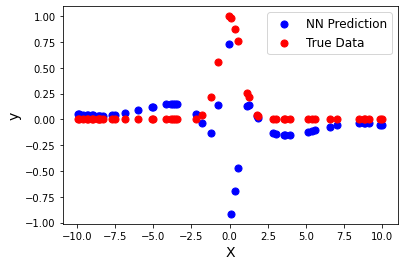

In [ ]:
plt.scatter(X_test, y_nn, s=50, color="blue",label="NN Prediction")
plt.scatter(X_test, y_test, s=50, color="red", label="True Data")
plt.legend(fontsize=12)
plt.xlabel("X",fontsize=14)
plt.ylabel("y",fontsize=14)

Next let's analyze the error numerically using the root mean-squared error (RMSE) function, which is simply the square root of the mean-squared error.  The RMSE gives the average error on each data point (instead of the squared average error) so it is a met more of a clear metric for error analysis.  First, let's define a function to calculate the RMSE between two data sets.

In [ ]:
def rmse(A,B):
    """
        Inputs:
            A,B (NumPy arrays)
        Returns:
            Unnamed (a float): the RMSE error between A and B
        Calculates the RMSE error between A and B.
    """
    assert len(A)==len(B),"The data sets must be the same length to calcualte\
        the RMSE."
    return np.sqrt(np.average((A-B)**2)) 

Now let's print the RMSE between the true test data set and the neural network prediction.

In [ ]:
print("RMSE between true test set and neural network result:", rmse(y_nn,y_test))

RMSE between true test set and neural network result: 0.4083000246981841


**EXERCISE 2**: Are you satisfied with the performance of this neural network?  If not, brainstorm some ways in which its performance may be improved.

Delete this text and type your response here.

## Neural Networks with a Popular Python Library

When using a neural network for most cases, instead of creating one by hand you will likely use a neural network implementation from a popular Python library.  These have several advantages including being able to easily use large networks (which would be hard to create by hand), the use of more advanced optimizers for training, and more optimized implementations to significantly decrease runtime (and likely more accuracy).

### Keras

One of the most popular machine learning library in Python is known as Keras, which is actually a wrapper for another machine learning library known as Tensorflow.  See the [Keras website](https://keras.io/) for more information.   Keras is very commonly used for training neural networks because it makes building and training neural networks simply and intuitive. 

Neural networks are build in keras by adding layers with the specified parameters to a model and then compiling the model with a loss function and an optimizer.  Here we use the same architecture as we have been using (two hidden layers with 25 neurons each and a hyperbolic tangent activation function).  The main difference here is that instead of using the gradient descent algorithm the optimize the weights of the neural network we will instead be using a much more powerful optimizer known as the Adam optimizer.

Epoch 1/200
7/7 [==============================] - 0s 3ms/step - loss: 0.1078
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 3/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0427
Epoch 4/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0409
Epoch 5/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0352
Epoch 6/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0326
Epoch 7/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0304
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.0283
Epoch 9/200
7/7 [==============================] - 0s 2ms/step - loss: 0.0264
Epoch 10/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0249
Epoch 11/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 12/200
7/7 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 13/200
7/7 [==============================] - 0s 3ms/st

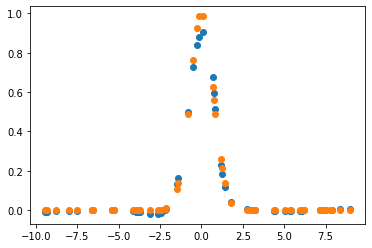

In [ ]:
import keras

# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 25, activation = 'tanh', input_dim=1))
model.add(keras.layers.Dense(units = 25, activation = 'tanh'))
model.add(keras.layers.Dense(units = 1, activation = 'tanh'))
model.compile(loss='mse', optimizer="adam")

model.fit(X_train,y_train,epochs=200)
y_nn = model.predict(X_test)
print(rmse(y_nn, y_test))
plt.scatter(X_test, y_nn)
plt.scatter(X_test,y_test)

**EXERCISE 3**: Of the three implementations of neural networks explored here (from scratch, Scikit-Learn, and Keras), which implementation do you think is best?  Consider not just the accuracy of the neural network but also its runtime and ease of use.

Delete this text and type your response here.

## Practice What You Have Learned

Go back to Exercise 2 where you brainstormed ways to improve the performance of the neural network.  Choose three of these ideas that you think are the most promising and implement them one at a time below the cell.  Copy and paste as much code from above as needed.  Record how your changes effect the error when predicting the test data set.  Were you able to get the error significantly lower than the notebook's result?